# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

## Getting Started

In this project, we will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. We will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. The goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Print Pretty
import pprint
pp = pprint.PrettyPrinter(indent=1)

# Load the Census dataset and as there are spaces use skipinitialspace
data = pd.read_csv("census.csv", skipinitialspace = True)

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


## Describe the Data

In [2]:
# Get the shape of the data
data.shape

(45222, 14)

In [3]:
# Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [4]:
# Describe the numeric data in the DataFrame
data.describe(include=[np.number])

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Describe the object data in the DataFrame
data.describe(include=[np.object])

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


In [6]:
# Display sample records
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


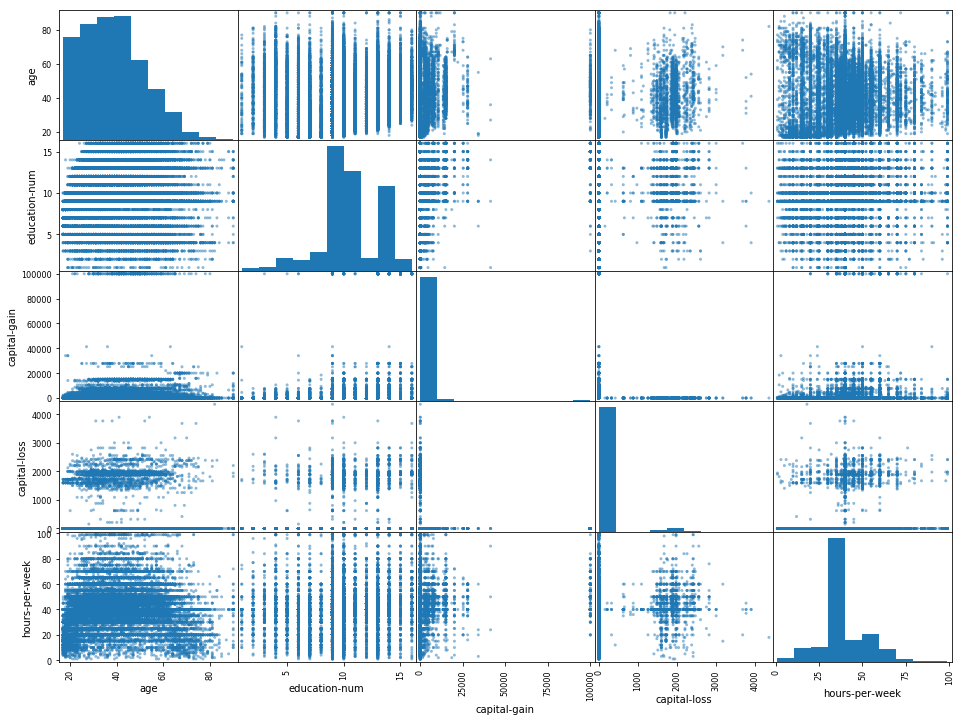

In [7]:
# Visualize the numeric data using a scatter matrix.
from pandas.plotting import scatter_matrix
df = data._get_numeric_data()
_ = scatter_matrix(df, alpha = 0.5, figsize=(16,12), diagonal = 'hist', grid = True)

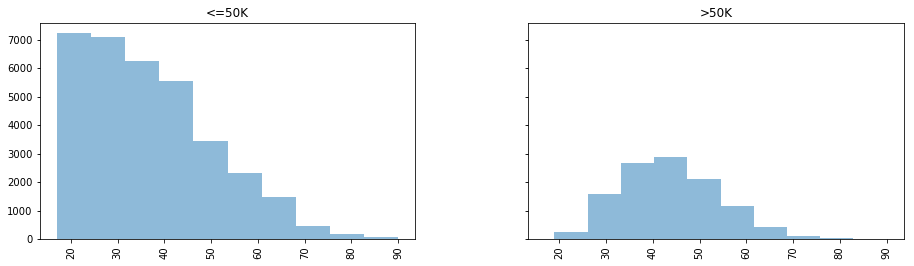

In [8]:
# Visualize Age vs Income
_ = data['age'].hist(alpha = 0.5, figsize=(15,4), by = data['income'], sharey = True, sharex = True)

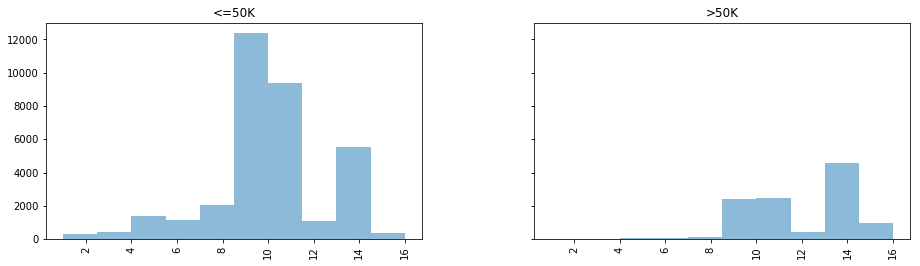

In [9]:
# Visualize Education-Num vs Income
_ = data['education-num'].hist(alpha = 0.5, figsize=(15,4), by = data['income'], sharey = True, sharex = True)

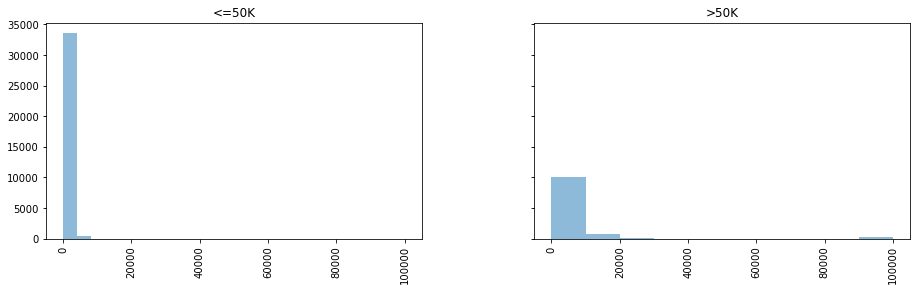

In [10]:
# Visualize Capital Gain vs Income
_ = data['capital-gain'].hist(alpha = 0.5, figsize=(15,4), by = data['income'], sharey = True, sharex = True)

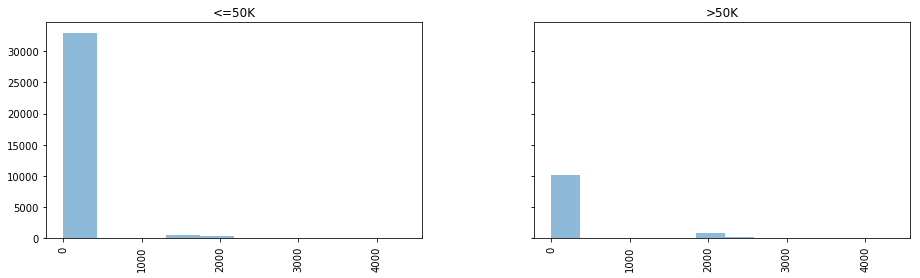

In [11]:
# Visualize Capital Loss vs Income
_ = data['capital-loss'].hist(alpha = 0.5, figsize=(15,4), by = data['income'], sharey = True, sharex = True)

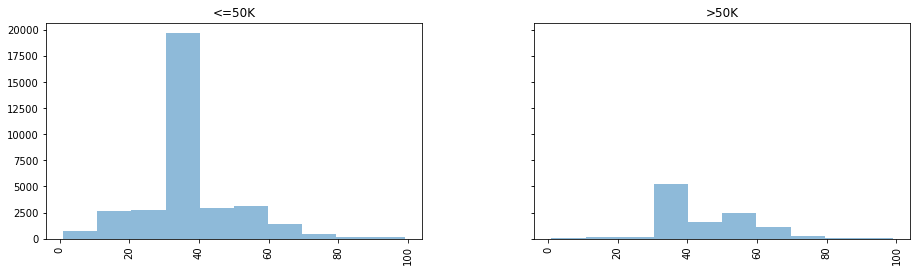

In [12]:
# Visualize Hours per Week vs Income
_ = data['hours-per-week'].hist(alpha = 0.5, figsize=(15,4), by = data['income'], sharey = True, sharex = True)

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [13]:
# Total number of records
n_records = len(data.index)

# Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'].str.match('>50K')].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'].str.match('<=50K')].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

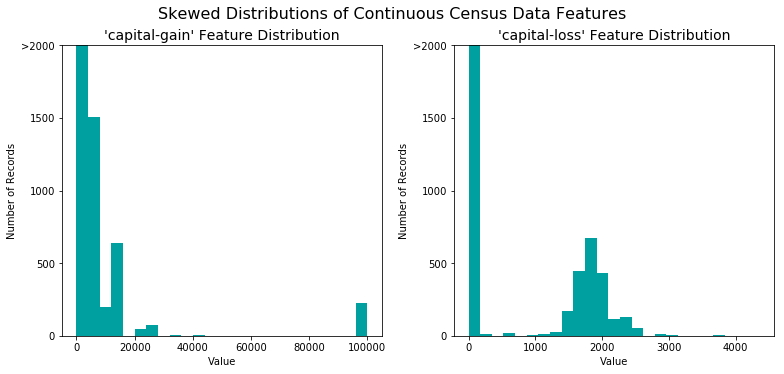

In [14]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

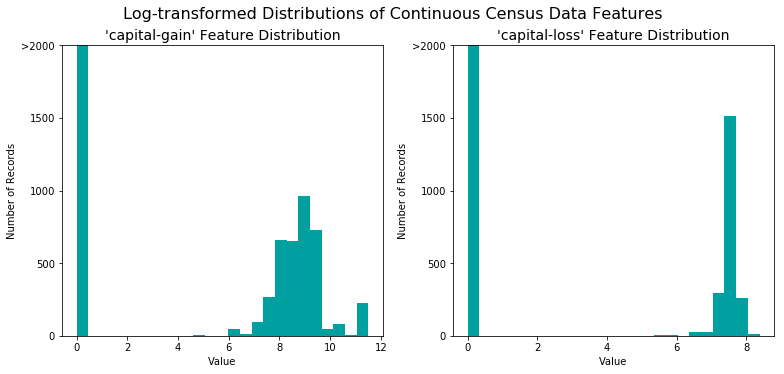

In [15]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [16]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [17]:
# Print the number of features before one-hot encoding
encoded = list(features_log_minmax_transform.columns)
print("{} total features before one-hot encoding.".format(len(encoded)))
print(encoded)
print("\n")

# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform, prefix_sep='_')

# Encode the 'income_raw' data to numerical values
from sklearn.preprocessing import LabelEncoder

income_le = LabelEncoder()
income_le.fit(["<=50K", ">50K"])
income = pd.Series(income_le.transform(income_raw))

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# See the encoded feature names
pp.pprint(encoded)

13 total features before one-hot encoding.
['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


103 total features after one-hot encoding.
['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_level_10th',
 'education_level_11th',
 'education_level_12th',
 'education_level_1st-4th',
 'education_level_5th-6th',
 'education_level_7th-8th',
 'education_level_9th',
 'education_level_Assoc-acdm',
 'education_level_Assoc-voc',
 'education_level_Bachelors',
 'education_level_Doctorate',
 'education_level_HS-grad',
 'education_level_Masters',
 'education_level_Preschool',
 'education_level_Prof-school',
 'education_level_Some-college',
 'marital-

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [19]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

'''
Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
'''
BETA = 0.5

# TruePositive (tp) is the no of rows with income >= 50K
tp = np.sum(income)
# FalsePositive (fp) is the no of rows that were incorrectly marked with income >= 50K
fp = income.count() - tp

# As all the data points are marked as positive (income >= 50K) 
# there will be no TrueNegatives and FalseNegatives
tn = 0
fn = 0

# Calculate accuracy, precision and recall

# accuracy = tp+tn/tp+fp+tn+fn
accuracy = (tp+tn)/(tp+fp+tn+fn)

# recall = tp/tp+fn
# As we are able to get all the positive records correctly
# there will be no FalseNegatives and so the recall would be '1'
recall = tp/(tp+fn)
print("Recall -> " + str(recall))

# precision = tp/tp+fp
# As there are many FalsePositives the precision would be 'Low'
precision = tp/(tp+fp)
print("Precision -> " + str(precision))

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+(BETA**2)) * ((precision * recall)/((BETA**2 * precision) + recall))

# Print the results 
print("\nNaive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Recall -> 1.0
Precision -> 0.247843969749

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


#### Show the Confusion Matrix

Display the Confusion Matrix with the naive prediction

tn: 0 | fp: 34014 | fn: 0 | tp: 11208


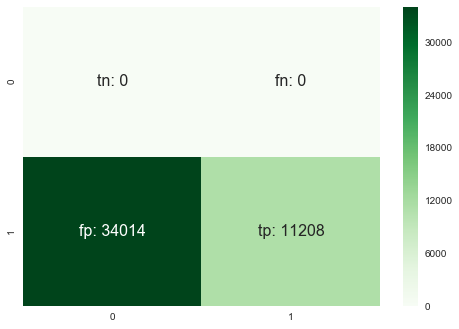

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_income = income.replace(0,1)
tn, fp, fn, tp = confusion_matrix(income, predicted_income).ravel()
print("tn: " + str (tn) + " | " + "fp: " + str (fp) + " | " + "fn: " + str (fn) + " | " + "tp: " + str (tp))

df_cm = pd.DataFrame([[tn, fn], [fp, tp]], range(2), range(2))
labels = np.asarray(['tn: ' + str(tn), 'fn: ' + str(fn), 'fp: ' + str(fp), 'tp: ' + str(tp)]).reshape(2,2)
_ = sns.heatmap(df_cm, annot=labels, annot_kws={"size": 16}, fmt = "", cmap = 'Greens')

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

**Decision Trees**

- _Describe one real-world application in industry where the model can be applied._ - Decision Trees could be used for problems where we have uniformly distributed data will very little noise. Decision tree algorithms can be used by banks to **classify loan applicants** by their probability of defaulting payments.
- _What are the strengths of the model; when does it perform well?_ - Decision Trees have a faster training speeds. Also the **simple visualization** process of Decision Trees helps us to understand the data better. Moreover Decision Trees **does not make assumptions** with data which would be very helpful under certain circumstances. Feature Scaling is also not required when using Decision Trees.
- _What are the weaknesses of the model; when does it perform poorly?_ - With Decision Trees there is a great chance of **overfitting** of data. So, care should be taken to reduce the tree height or use some ensemble model to create a forest of trees.
- _What makes this model a good candidate for the problem, given what you know about the data?_ - Decision Trees are easy to visualize and will help a lot in understanding the data easily. As we have few features in this problem we could use Decision Trees to get better insights.

**Support Vector Machines (SVM)**

- _Describe one real-world application in industry where the model can be applied._ -  SVC is usually used in **stock markets** to classify different stocks based on multiple parameters. SVC is also popular with **text classification** where the dimensionality is very high.
- _What are the strengths of the model; when does it perform well?_ - SVC usually offers **best prediction** with data as it does not make any strong assumptions on data. When the data is not linearly separable, we could use the '**Kernel Trick**' for better classification of the data.
- _What are the weaknesses of the model; when does it perform poorly?_ - SVC usually takes a **longer time**, compared to other models, for training on larger data sets. SVC may perform poorly with noisy data.
- _What makes this model a good candidate for the problem, given what you know about the data?_ - From the initial analysis looks like our data is linearly separable and so SVM should be a good model. As we have many data points it could be that SVC mght take a little bit more time compared to other models but that should be offset by a good score.

**Logistic Regression**

- _Describe one real-world application in industry where the model can be applied._ - Logistic Regression could be used when there is a requirement to model the probabilities of the dependent variable as a function of the independent variables like in **medical** and **social sciences**. It can be used in predicting the probability of a banking customer purchasing another related product.
- _What are the strengths of the model; when does it perform well?_ - Logistic Regression is a **robust algorithm** as the independent variables need not have equal variance or normal distribution. Also, these algorithms **do not assume a linear relationship** between the dependent and independent variables and hence perform well with non-linear data.
- _What are the weaknesses of the model; when does it perform poorly?_ - Logistic Regression **needs lot of data** for better predictions. Also, when the training data is sparse and high dimensional it **may over fit** the training data.
- _What makes this model a good candidate for the problem, given what you know about the data?_ - As we have huge data set with good number of features, after on-hot encoding, we can use Logistic Regression for our problem.


**References**

- https://www.dezyre.com/article/top-10-machine-learning-algorithms/202
- http://www.dataschool.io/comparing-supervised-learning-algorithms/
- http://scikit-learn.org/stable/tutorial/machine_learning_map/
- https://docs.microsoft.com/en-gb/azure/machine-learning/studio/algorithm-cheat-sheet
- https://en.wikipedia.org/wiki/Logistic_regression
- https://en.wikipedia.org/wiki/Support_vector_machine
- https://en.wikipedia.org/wiki/Decision_tree_learning
- https://www.quora.com/

### Models Chosen for this Problem

- Support Vector Machines (SVM)
- Logistic Regression
- Decision Tree

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [21]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Slice the data using the 'sample_size'
    training_features = X_train.iloc[:sample_size]
    training_labels = y_train.iloc[:sample_size]
    
    # No of training samples
    NO_TRAINING_SAMPLES = 300
    
    # beta value for fbscore
    BETA = 0.5
        
    # Fit the learner to the training data
    start_time = time() # Get start time
    learner.fit(training_features, training_labels.values.ravel())
    end_time = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = float(format(end_time - start_time, '.3f'))
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start_time = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train.iloc[:NO_TRAINING_SAMPLES])
    end_time = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = float(format(end_time - start_time, '.3f'))
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = float(format(accuracy_score(y_train[:NO_TRAINING_SAMPLES], predictions_train), '.3f'))
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = float(format(accuracy_score(y_test, predictions_test), '.3f'))
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = float(format(fbeta_score(y_train[:NO_TRAINING_SAMPLES], predictions_train, beta = BETA), '.3f'))
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = float(format(fbeta_score(y_test, predictions_test, beta = BETA), '.3f'))
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


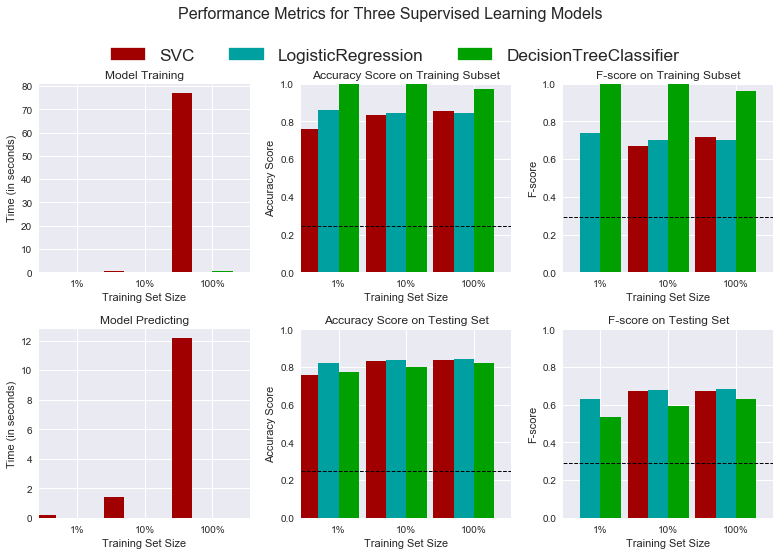

In [22]:
# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Supress the UndefinedMetricWarning thrown by SVC whie calculating
# fbeta_score of 0 when sample is 1%
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

# Initialize the three models
clf_A = SVC(random_state = 0)
clf_B = LogisticRegression(random_state = 0)
clf_C = DecisionTreeClassifier(random_state = 0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = int(len(y_train) * 1)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

### Performance Metrics for Three Supervised Learning Models

In [23]:
from IPython.core.display import display, HTML

# Convert the results dict to a DataFrame
results_df = pd.DataFrame(results)

# Create a HTML file from the dict.
# Set the max_colwidth to full width (-1) and reset it back to default (50)
pd.set_option('display.max_colwidth', -1)
results_df.to_html('result.html')
pd.set_option('display.max_colwidth', 50)

# Display the HTML File
display(HTML('result.html'))

,DecisionTreeClassifier,LogisticRegression,SVC
0,"{'train_time': 0.0, 'pred_time': 0.016, 'acc_train': 1.0, 'acc_test': 0.772, 'f_train': 1.0, 'f_test': 0.536}","{'train_time': 0.0, 'pred_time': 0.0, 'acc_train': 0.86, 'acc_test': 0.819, 'f_train': 0.739, 'f_test': 0.629}","{'train_time': 0.007, 'pred_time': 0.171, 'acc_train': 0.76, 'acc_test': 0.756, 'f_train': 0.0, 'f_test': 0.0}"
1,"{'train_time': 0.016, 'pred_time': 0.016, 'acc_train': 0.997, 'acc_test': 0.802, 'f_train': 0.997, 'f_test': 0.594}","{'train_time': 0.0, 'pred_time': 0.0, 'acc_train': 0.847, 'acc_test': 0.839, 'f_train': 0.703, 'f_test': 0.678}","{'train_time': 0.632, 'pred_time': 1.383, 'acc_train': 0.833, 'acc_test': 0.833, 'f_train': 0.671, 'f_test': 0.671}"
2,"{'train_time': 0.328, 'pred_time': 0.016, 'acc_train': 0.97, 'acc_test': 0.819, 'f_train': 0.964, 'f_test': 0.628}","{'train_time': 0.223, 'pred_time': 0.0, 'acc_train': 0.847, 'acc_test': 0.842, 'f_train': 0.699, 'f_test': 0.683}","{'train_time': 77.095, 'pred_time': 12.161, 'acc_train': 0.853, 'acc_test': 0.837, 'f_train': 0.72, 'f_test': 0.674}"


----
## Improving Results
In this final section, we will choose from the three supervised learning models the *best* model to use on the student data. We will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models we believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

From the above performance metric we can conclude:

- From model training time, we could see that SVC has taken a lot of time compared to the other classifiers. But 70 seconds should also be an OK.
- From model predicting time, we could see that SVC has taken more time compared to the other classifiers. But 12 seconds should be an acceptable time.

- The Accuracy Score and F-Score on the training set clearly shows that DecisionTreeClassifier is doing a better job than SVC and LogisticRegression. But this could be because of DecisionTreeClassifier's overfitting which is giving it a high score and this is evident from it's low testing score.

- The Accuracy Score and F-Score on the testing set is better with SVC and LogisticRegression. But as the training and predicting time is very less for LogisticRegression, we will choose it for this problem and fine tune it further.

_Chosen Best Model_ - **LogisticRegression**

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: **

Logistic Regression, similar to the Linear Regression, uses an equation to represent the data and then predict the dependent variable (y) from the independent variables (x1, x2, .... xn). The only difference with Logistic Regression from Linear Regression is that it outputs a binary value (1 or 0) instead of a continuous value. Logistic Regression uses the logistic function ($1/1+e^{-x}$) to output an 'S' shaped curve between 0 and 1.

> $y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ...... + \beta_{n}x_{n}$

In the above equation {$\beta_{1}, \beta_{2} ... \beta_{n}$} are the input features like age, sex, workclass etc. Though the Logistic Regression uses a linear method it predicts a binary value using the logistic function.

**Logistic Regression Highlights**

- Binary logistic regression predicts the dependent variable as binary output.
- It involves a more probabilistic view of classification.
- The independent variables should be independent of each other.
- Logistic regression requires large sample sizes for better prediction.
- Logistic regression estimates the coefficients ($\beta$) from the training data.
- Once the Logistic regression model is built, predictions can be made by plugging in the data values in the equation.
- Takes less time for training.
- Good accuracy for many simple data sets.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [24]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the best classifier chosen in the previous step
clf = LogisticRegression(random_state = 0)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'C': [5, 25]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = BETA)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer, cv = 5, n_jobs = -1, verbose = 1)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print("Best Params\n-------")
print(grid_fit.best_params_)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("\nUnoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.8s finished


Best Params
-------
{'C': 5, 'solver': 'liblinear'}

Unoptimized model
------
Accuracy score on testing data: 0.8419
F-score on testing data: 0.6832

Optimized Model
------
Final accuracy score on the testing data: 0.8418
Final F-score on the testing data: 0.6828


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |       0.8419      |    0.8418       |
| F-score        |       0.6832      |    0.6828       |


**Answer: **

- _What is your optimized model's accuracy and F-score on the testing data?_ Accuracy is 0.8418 and F-Score is 0.6829
- _Are these scores better or worse than the unoptimized model?_ Both the scores are almost the same. (Even with GridSearchCV, the parameters that were chosen to be best are similar to the defualt parameters and so is the same score. This might be a rare case. But usually with GridSearchCV we will be able to find better parameters that can improve our score.)
- _How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_ The results are extremely better with the optimized model compared to the naive model.  

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

In [25]:
pp.pprint(data.columns)

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


**Answer:**

From the initial exploration, it seems that the below features have high importance in order.

- **Occupation** - This will definitely give an indication of the income.
- **Capital Gain** - This feature will help us to estimate a persons income better.
- **Education Level** - A better education level mostly brings a very good job and thus high income.
- **Age** - Most often people in their mid age earn better than the recent entrants.
- **Work Class** - This will allow us to get a good estimate of a persons income.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

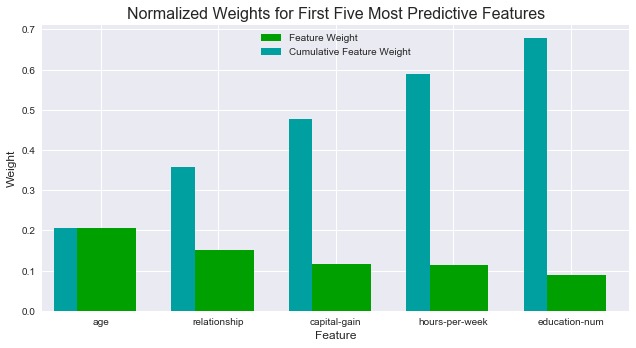

In [26]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Train the supervised model on the training set using .fit(X_train, y_train)
labelencoder = LabelEncoder()

X_train_fi = data.loc[: , data.columns != 'income'].copy()
for col in X_train_fi.columns:
    if X_train_fi[col].dtype == object:
        X_train_fi.loc[:,col] = labelencoder.fit_transform(X_train_fi.loc[:,col]).copy()
y_train_fi = data['income']

model_fi = RandomForestClassifier(random_state = 0)
model_fi.fit(X_train_fi, y_train_fi)

# Extract the feature importances using .feature_importances_ 
importances_fi = model_fi.feature_importances_

# Plot
vs.feature_plot(importances_fi, X_train_fi, y_train_fi)

### Normalized Weights for First Five Most Predictive Features After One-Hot Encoding

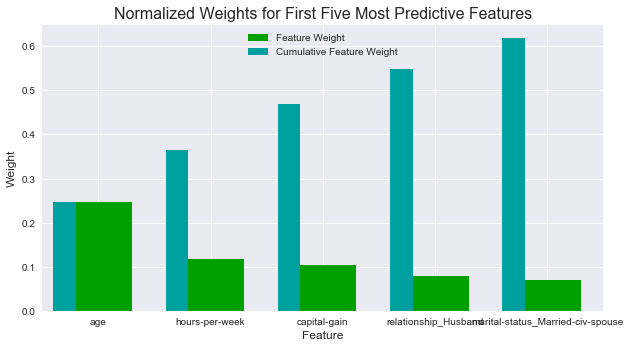

In [27]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

- _How do these five features compare to the five features you discussed in **Question 6**?_ - I was probably half way through correctly identifying the top most features. There are exactly two overlaps - Capital Gain and Age. Also the Education Level that I predicted closely correlates to the Education Number that was predicted by the model. One feature that I really did not think about is the Relationship which was selected by the model.
- _If you were close to the same answer, how does this visualization confirm your thoughts?_ - I feel that some of the top features that I observed, like Capital Gain and Age, are confirmed by the model also.
- _If you were not close, why do you think these features are more relevant?_ - One feature that I really did not think coming up in the top 5 is Relationship. Probably Relationship might give us a better information like dependents, monthly spends and thus better predicting the income class.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [28]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8418
F-score on testing data: 0.6828

Final Model trained on reduced data
------
Accuracy on testing data: 0.7858
F-score on testing data: 0.5202


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

- _How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?_ - Obviously with less features the F-Score and Accuracy will drop. Depending on the requirement, other factors like computation power, model run time and the acceptable error rate we can choose the number of features in the final mode. In this case we could have chosen the top 20 features from the available 103 features to get a better score.
- _If training time was a factor, would you consider using the reduced data as your training set?_ - Definitely training time is one of the most important consideration while choosing the number of features. If we are doing a POC, we could probably choose only the top 10% of the features to get quicker results. This will also help us in saving the computational power. Later, for the main application we could choose, say top 80% of the features.